# Import das bibliotecas

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

# Carregando o dataset na memória

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


# Escalando as features(Cada pixel entre 0 e 1)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
#Nomes das classes(Labels)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Criando o modelo usando a API Sequencial do Keras
## Duas hidden layers(Ativação RELU)
 - ### Primeira: 300 hidden units
 - ### Segunda: 100 hidden units

## Uma output layer com 10 output units(Ativação softmax)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Compilação do modelo

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Treinando o modelo

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7191 - accuracy: 0.7634 - val_loss: 0.5214 - val_accuracy: 0.8180
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4888 - accuracy: 0.8305 - val_loss: 0.4533 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4448 - accuracy: 0.8439 - val_loss: 0.4407 - val_accuracy: 0.8448
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4172 - accuracy: 0.8533 - val_loss: 0.3968 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3976 - accuracy: 0.8602 - val_loss: 0.3826 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3818 - accuracy: 0.8653 - val_loss: 0.3814 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3677 - accuracy: 0.8708 - val_loss: 0.3649 - val_accuracy:

# Plot dos resultados

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

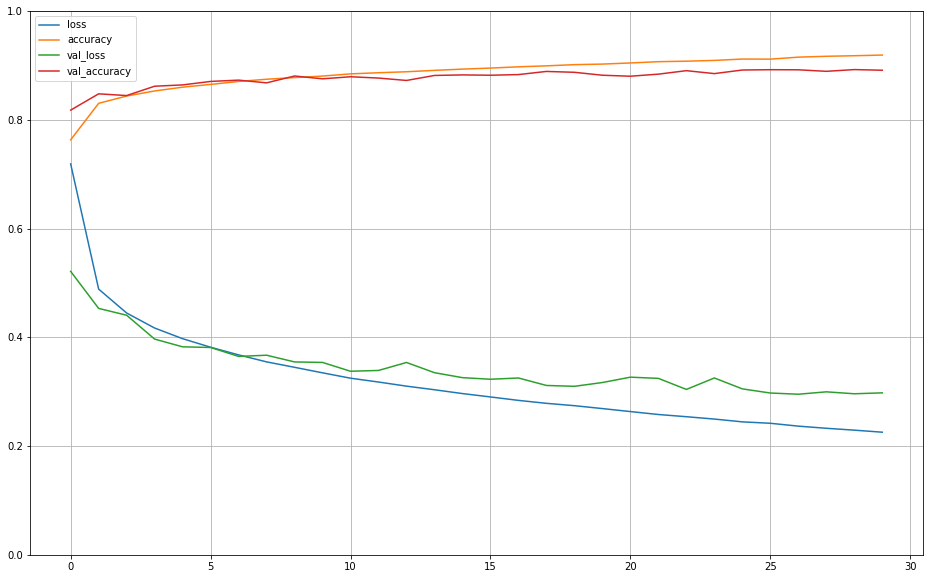

In [33]:
pd.DataFrame(history.history).plot(figsize=(16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 56.0988 - accuracy: 0.8564


[56.098838806152344, 0.8564000129699707]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)